# Phase Portrait Applications

Teng-Jui Lin

Content adapted from UW AMATH 301, Beginning Scientific Computing, in Spring 2020.

- Phase portraits
    - "Two-eyed monster"

## Two-eyed monster

The system of ODEs

$$
\begin{aligned}
\dot{x} &= y + y^2 \\
\dot{y} &= 0.5x + 0.2y - xy + 1.2y^2
\end{aligned}
$$

is called the "two-eyed monster."

### Static phase portrait

**Problem Statement.** Consider the "two-eyed monster" system of ODEs.

(a) Plot the phase portrait of the ODE system with the initial conditions of the equidistant grid of points in $(x, y) \in [-5, 3] \times [-3, 2]$ with $\Delta x = \Delta y = 0.5$ from times $t \in [0, 100]$.

(b) Plot the phase portrait of the ODE system with the initial conditions (x, y) of

`[0.01, 0], [-1, -3], [-3, -2], [-2, -3], [1, -3], [-3, 0], [-3, -1]`

with $\Delta x = \Delta y = 0.5$ for times $t \in [0, 100]$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import integrate

In [2]:
# quiver grid and initial conditions
xvec = np.linspace(-5, 3, 15)
yvec = np.linspace(-3, 2, 15)
X, Y = np.meshgrid(xvec, yvec)
initial_vals = np.meshgrid(xvec, yvec)
initial_vals = np.array([initial_vals[0].reshape(-1), initial_vals[1].reshape(-1)]).T

In [3]:
# time array
t_initial = 0
t_final = 100
dt = 0.1
t = np.arange(t_initial, t_final+dt/2, dt)

In [4]:
# ode system
dxdt = lambda x, y : y + y**2
dydt = lambda x, y : -0.5*x + 0.2*y - x*y + 1.2*y**2
ode_syst = lambda t, z : np.array([dxdt(*z), dydt(*z)])

In [5]:
def custom_plot_settings():
    %config InlineBackend.figure_format = 'retina'
    %matplotlib inline

    plt.rcParams.update({
        'font.family': 'Arial',  # Times New Roman, Calibri
        'font.weight': 'normal',
        'mathtext.fontset': 'cm',
        'font.size': 18,

        'lines.linewidth': 2,

        'axes.linewidth': 2,
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.titleweight': 'bold',
        'axes.titlesize': 18,
        'axes.labelweight': 'bold',

        'xtick.major.size': 8,
        'xtick.major.width': 2,
        'ytick.major.size': 8,
        'ytick.major.width': 2,

        'figure.dpi': 80,
        'savefig.dpi': 300,

        'legend.framealpha': 1, 
        'legend.edgecolor': 'black',
        'legend.fancybox': False,
        'legend.fontsize': 14,

        'animation.html': 'html5',
        'animation.ffmpeg_path': r'C:\\Softwares\\ffmpeg\\bin\\ffmpeg.exe',
    })

custom_plot_settings()

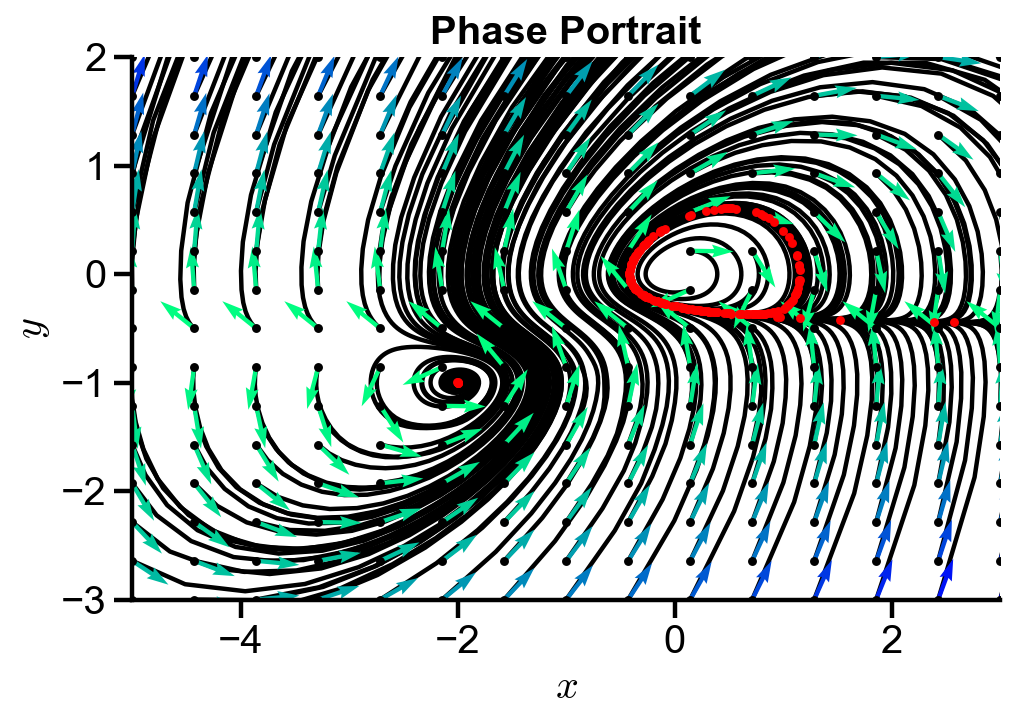

In [6]:
fig, ax = plt.subplots(figsize=(7, 7))
# slope field
scale = np.sqrt(dxdt(X, Y)**2 + dydt(X, Y)**2)
ax.quiver(X, Y, dxdt(X, Y)/scale, dydt(X, Y)/scale, scale, cmap='winter_r', scale=20, width=0.005)  # regular
# plot settings
ax.set_xlim(-5, 3)
ax.set_ylim(-3, 2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Phase Portrait')
ax.set_aspect('equal')

for i in range(len(initial_vals)):
    # ode soln
    ode_soln = scipy.integrate.solve_ivp(ode_syst, [t_initial, t_final], initial_vals[i], t_eval=t)
    # phase portrait
    ax.plot(ode_soln.y[0], ode_soln.y[1], color='black', zorder=0.5)
    ax.plot(ode_soln.y[0, -1], ode_soln.y[1, -1], '.', color='red', zorder=4)
    ax.plot(*initial_vals[i], '.', color='black')

▲ The figure above shows the trajectories of a grid of initial conditions for the two-eyed monster system. Most of the initial conditions spiral into the two eyes and form loops around the eyes. The final state denoted in red forms a loop about the eye or is at the eye center.

In [7]:
# initial conditions [x0, y0]
initial_vals = np.array([[0.01, 0], [-1, -3], [-3, -2], [-2, -3], [1, -3], [-3, 0], [-3, -1]])

In [8]:
# quiver grid
xvec = np.linspace(-3, 1.5, 20)
yvec = np.linspace(-2, 1, 20)
X, Y = np.meshgrid(xvec, yvec)

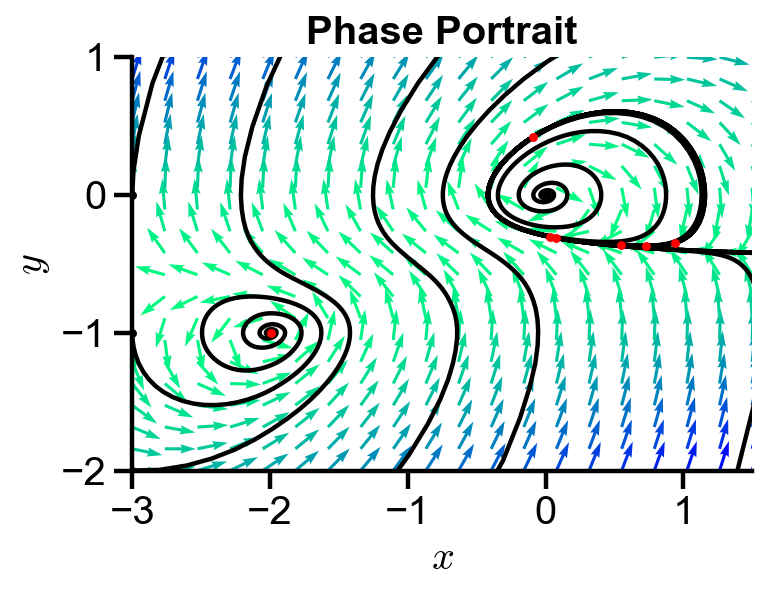

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))
# slope field
scale = np.sqrt(dxdt(X, Y)**2 + dydt(X, Y)**2)
ax.quiver(X, Y, dxdt(X, Y)/scale, dydt(X, Y)/scale, scale, cmap='winter_r', scale=20, width=0.005)  # regular
# plot settings
ax.set_xlim(-3, 1.5)
ax.set_ylim(-2, 1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Phase Portrait')
ax.set_aspect('equal')

for i in range(len(initial_vals)):
    # ode soln
    ode_soln = scipy.integrate.solve_ivp(ode_syst, [t_initial, t_final], initial_vals[i], t_eval=t)
    # phase portrait
    ax.plot(ode_soln.y[0], ode_soln.y[1], color='black')
    ax.plot(ode_soln.y[0, -1], ode_soln.y[1, -1], '.', color='red', zorder=4)
    ax.plot(*initial_vals[i], '.', color='black')

▲ The figure above shows the trajectories of particular initial conditions for the two-eyed monster system. The trajectory spirals into the eyes or curve around the eyes.

### Animated phase portrait

In [10]:
# time array
t_initial = 0
t_final = 50
dt = 0.1
t = np.arange(t_initial, t_final+dt/2, dt)
t_len = len(t)

# ode system
dxdt = lambda x, y : y + y**2
dydt = lambda x, y : -0.5*x + 0.2*y - x*y + 1.2*y**2
ode_syst = lambda t, z : np.array([dxdt(*z), dydt(*z)])

# quiver grid and initial conditions
xvec = np.linspace(-5, 3, 15)
yvec = np.linspace(-3, 2, 15)
X, Y = np.meshgrid(xvec, yvec)
initial_vals = np.meshgrid(xvec, yvec)
initial_vals = np.array([initial_vals[0].reshape(-1), initial_vals[1].reshape(-1)]).T

# ode soln for grid of initial conditions
ode_solns = [0]*len(initial_vals)
for i in range(len(initial_vals)):
    ode_solns[i] = scipy.integrate.solve_ivp(ode_syst, [t_initial, t_final], initial_vals[i], t_eval=t).y
ode_solns = np.array(ode_solns)

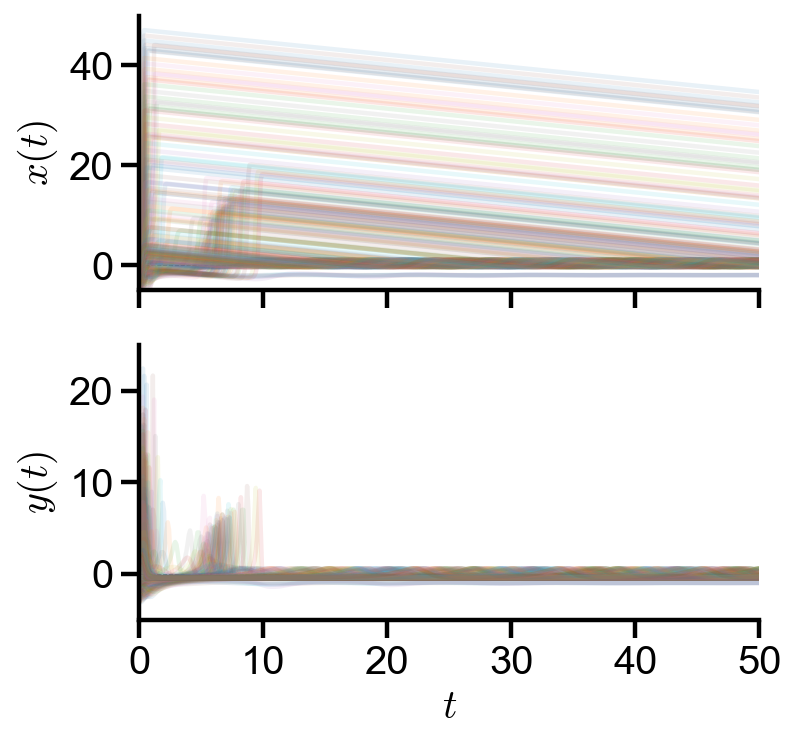

In [11]:
custom_plot_settings()

fig, axs = plt.subplots(2, 1, figsize=(5, 5), sharex=True)
axs[0].set_ylabel('$x(t)$')
axs[1].set_ylabel('$y(t)$')
axs[1].set_xlabel('$t$')
axs[0].set_ylim(-5, 50)
axs[1].set_ylim(-5, 25)

for i in range(len(initial_vals)):
    axs[0].plot(t, ode_solns[i, 0], label='$x(t)$', alpha=0.1)
    axs[1].plot(t, ode_solns[i, 1], label='$y(t)$', alpha=0.1)

for i in range(2):
    axs[i].plot([t_initial, t_final], [0, 0], '--', color='grey', lw=0.5, zorder=0)  # zero ref
    axs[i].set_xlim(t_initial, t_final)

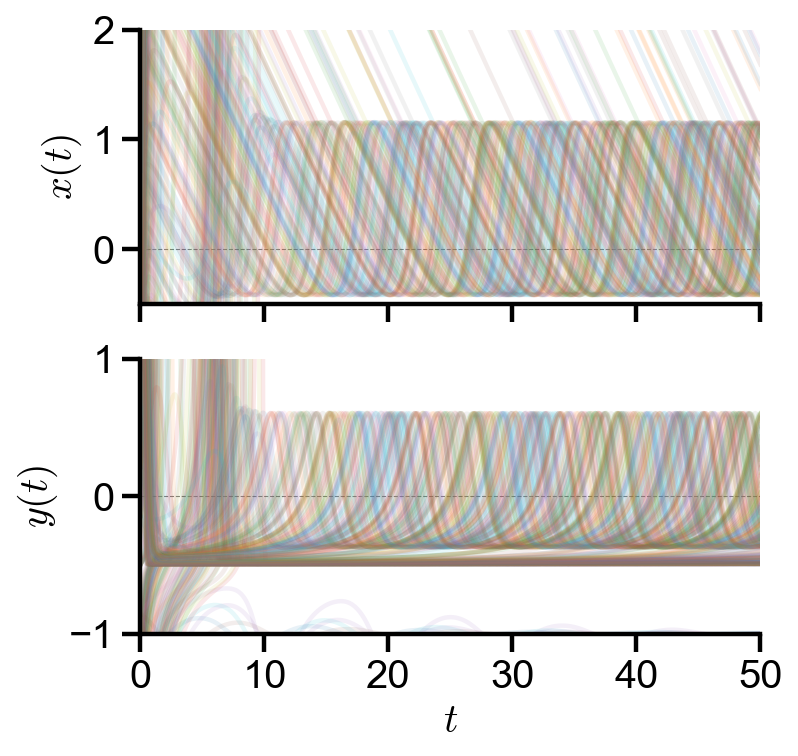

In [12]:
custom_plot_settings()

fig, axs = plt.subplots(2, 1, figsize=(5, 5), sharex=True)
axs[0].set_ylabel('$x(t)$')
axs[1].set_ylabel('$y(t)$')
axs[1].set_xlabel('$t$')
axs[0].set_ylim(-0.5, 2)
axs[1].set_ylim(-1, 1)

for i in range(len(initial_vals)):
    axs[0].plot(t, ode_solns[i, 0], label='$x(t)$', alpha=0.1)
    axs[1].plot(t, ode_solns[i, 1], label='$y(t)$', alpha=0.1)

for i in range(2):
    axs[i].plot([t_initial, t_final], [0, 0], '--', color='grey', lw=0.5, zorder=0)  # zero ref
    axs[i].set_xlim(t_initial, t_final)

In [13]:
def make_animation(t_range=t_len, anim_time=4, fps=60, xmin=-5, xmax=3, ymin=-3, ymax=2):
    '''
    This function is notebook-specific and not meant to generalize to other settings.
    Makes animation of time-dependent phase portrait.
    Warning: Many parameters are taken from the global namespace. They need to be defined before use.
    '''
    # back to static plot and animations
    custom_plot_settings()

    # plot static portion
    fig, ax = plt.subplots(figsize=(8/1.2, 5/1.2))
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_xlabel('$x(t)$')
    ax.set_ylabel('$y(t)$')
    ax.set_aspect('equal')
    plt.tight_layout()

    # plot empty framework
    points = np.zeros(len(initial_vals), dtype=object)
    current_points = np.zeros(len(initial_vals), dtype=object)
    for i in range(len(initial_vals)):
        points[i], = ax.plot([], [], '.', color='black', alpha=0.05)
        current_points[i], = ax.plot([], [], '.', color='red', alpha=0.2, zorder=10)
    scale = np.sqrt(dxdt(X, Y)**2 + dydt(X, Y)**2)
    qr = ax.quiver(X, Y, dxdt(X, Y)/scale, dydt(X, Y)/scale,
                   scale, cmap='winter_r', scale=20, width=0.005, zorder=3)
    title = ax.set_title('')


    def draw_frame(n):
        '''
        Commands to update parameters.
        Here, the phase portrait data points and quiver each frame.
        '''
        time_points = round(t_range/frame_num)
        frame_final_time = min(time_points*n+time_points, t_range-1)  # avoid index out of range
        for i in range(len(initial_vals)):
            points[i].set_data(ode_solns[i, :, :frame_final_time])
            current_points[i].set_data(*ode_solns[i, :, frame_final_time-1:frame_final_time])
        scale = np.sqrt(dxdt(X, Y)**2 + dydt(X, Y)**2)
        qr.set_UVC(dxdt(X, Y)/scale, dydt(X, Y)/scale, C=scale)
        title.set_text(f't = {t[frame_final_time] :.3f}')
        return fig,

    # create animation of given time length
    # note here we fit all the data points into the given animation time
    from matplotlib import animation
    frame_num = int(fps * anim_time)
    anim = animation.FuncAnimation(fig, draw_frame, frames=frame_num, interval=1000/fps, blit=True)

    plt.close()  # disable showing initial frame
    
    return anim

In [14]:
# convert animation to video (time-limiting step)
from IPython.display import HTML
anim = make_animation()  # uses custom function above
HTML(anim.to_html5_video() + '<style>video{width: 400px !important; height: auto;}</style>')

In [16]:
# convert animation to video (time-limiting step)
from IPython.display import HTML
anim = make_animation(t_range=int(t_len/2))  # uses custom function above
HTML(anim.to_html5_video() + '<style>video{width: 400px !important; height: auto;}</style>')